# Carbon Dioxide Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Website
from urllib.request import urlopen 
def read_url(url): 
    print(urlopen(url).read().decode())
read_url("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt")

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 
# ESRL should be informed at the outset of the nature of this work.  
# If the ESRL data are essential to the work, or if an important 
# result or conclusion depends on the ESRL data, co-authorship
# may be appropriate.  This should be discussed at an early stage in
# the work.  Manuscripts using the ESRL data should be sent to ESRL
# for review before they are submitted for publication so we can
# ensure that the quality and lim

In [3]:
## Import the data in table format:
df = pd.read_table("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt", 
                 comment = "#", delim_whitespace = True,
                names = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"],
                na_values = [-99.99, -1])
## show a preview of what our data looks like
df

,year,month,decimal_date,average,interpolated,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,NaN
1,1958,4,1958.292,317.45,317.45,315.29,NaN
2,1958,5,1958.375,317.50,317.50,314.71,NaN
3,1958,6,1958.458,NaN,317.10,314.85,NaN
4,1958,7,1958.542,315.86,315.86,314.98,NaN
5,1958,8,1958.625,314.93,314.93,315.94,NaN
6,1958,9,1958.708,313.20,313.20,315.91,NaN
7,1958,10,1958.792,NaN,312.66,315.61,NaN
8,1958,11,1958.875,313.33,313.33,315.31,NaN
9,1958,12,1958.958,314.67,314.67,315.61,NaN


In [4]:
df.describe()

,year,month,decimal_date,average,interpolated,trend,days
count,734.000000,734.000000,734.00000,727.000000,734.000000,734.000000,540.000000
mean,1988.250681,6.491826,1988.75000,354.467717,354.179537,354.172752,25.407407
std,17.672088,3.453343,17.66932,27.818721,27.860020,27.788450,4.280163
min,1958.000000,1.000000,1958.20800,313.200000,312.660000,314.620000,0.000000
25%,1973.000000,3.250000,1973.47900,329.020000,328.667500,329.630000,24.000000
50%,1988.000000,6.000000,1988.75000,352.090000,351.575000,352.235000,26.000000
75%,2003.750000,9.000000,2004.02100,376.850000,376.637500,376.802500,28.000000
max,2019.000000,12.000000,2019.29200,413.320000,413.320000,410.930000,31.000000


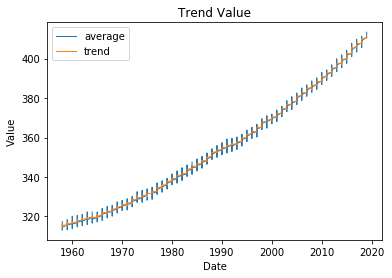

In [5]:
plt.plot(df["year"], df[["average","trend"]], lw=1)
plt.title('Trend Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(['average','trend'])

Text(0,0.5,'CO2')

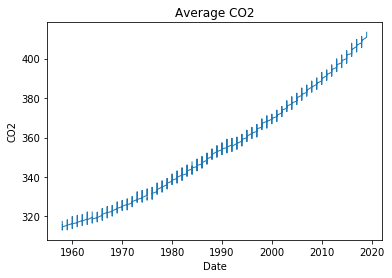

In [6]:
plt.plot(df["year"], df["average"], lw=1)
plt.title('Average CO2')
plt.xlabel('Date')
plt.ylabel('CO2')

## Forecast CO2

In [7]:
from fbprophet import Prophet

In [8]:
df1 = df.copy()

In [9]:
df1['Date'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))

In [10]:
df1 = df1.rename(index=str, columns={"Date": "ds", "trend": "y"})

In [11]:
df1.head()

,year,month,decimal_date,average,interpolated,y,days,ds
0,1958,3,1958.208,315.71,315.71,314.62,NaN,1958-03-01
1,1958,4,1958.292,317.45,317.45,315.29,NaN,1958-04-01
2,1958,5,1958.375,317.50,317.50,314.71,NaN,1958-05-01
3,1958,6,1958.458,NaN,317.10,314.85,NaN,1958-06-01
4,1958,7,1958.542,315.86,315.86,314.98,NaN,1958-07-01


In [12]:
df1 = df1.drop(['year','month','decimal_date','average','interpolated','days'], axis=1)

In [13]:
df1 = df1[['ds', 'y']]

In [14]:
# Normalize Data [0,1]
df1['y'] = (df1['y']-df1['y'].min()) / (df1['y'].max()-df1['y'].min())

In [15]:
df1.head()

,ds,y
0,1958-03-01,0.000000
1,1958-04-01,0.006957
2,1958-05-01,0.000934
3,1958-06-01,0.002388
4,1958-07-01,0.003738


In [16]:
df2 = df1.copy()

In [17]:
model = Prophet(yearly_seasonality=True) #instantiate Prophet
model.fit(df1) #fit the model with your dataframe

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future_data = model.make_future_dataframe(periods=365)

In [19]:
forecast_data = model.predict(future_data)

In [20]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1094,2020-03-27,1.013317,1.008132,1.018454
1095,2020-03-28,1.013421,1.007697,1.019122
1096,2020-03-29,1.013640,1.007784,1.018871
1097,2020-03-30,1.013969,1.007738,1.018999
1098,2020-03-31,1.014401,1.008923,1.019634


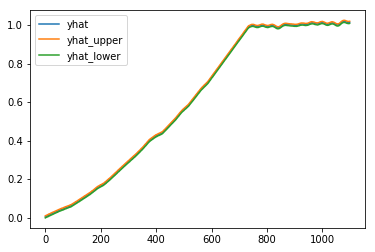

In [21]:
plt.plot(forecast_data[['yhat','yhat_upper','yhat_lower']])
plt.legend(labels=['yhat','yhat_upper','yhat_lower'])

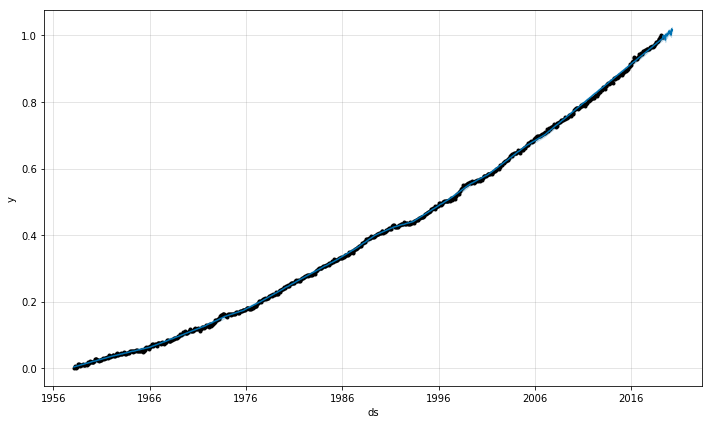

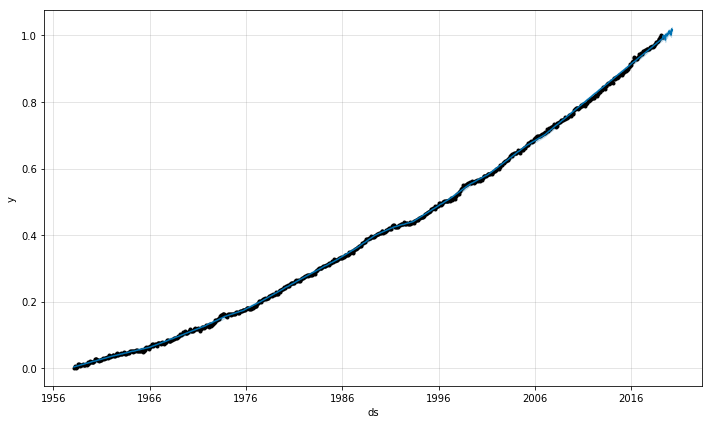

In [22]:
model.plot(forecast_data)

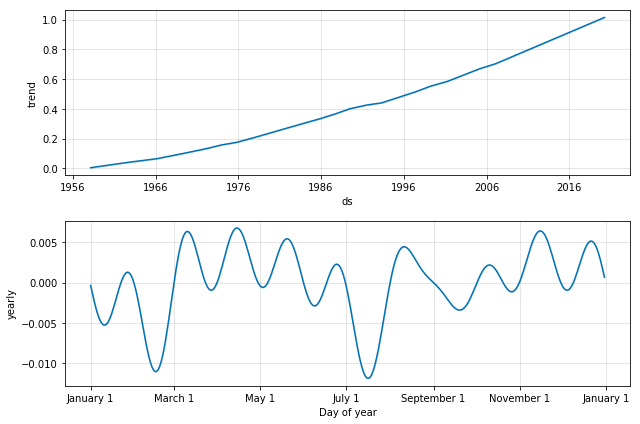

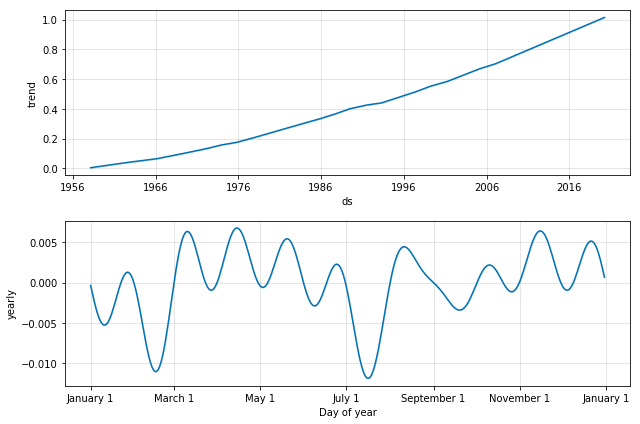

In [23]:
model.plot_components(forecast_data)

In [24]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

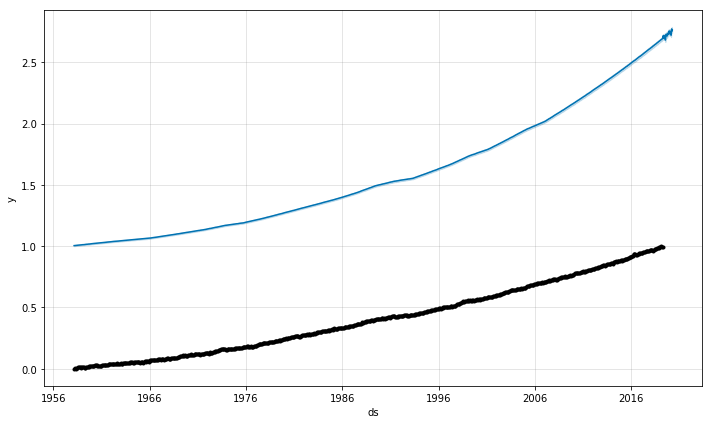

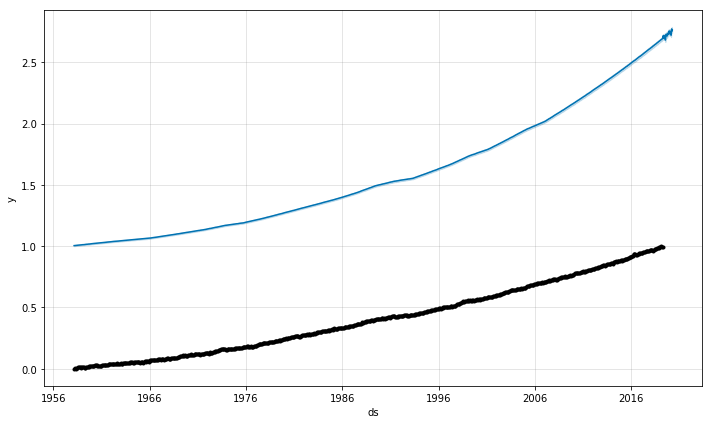

In [25]:
model.plot(forecast_data_orig)

In [43]:
df2

,ds,y
0,1958-03-01,0.000000
1,1958-04-01,0.006957
2,1958-05-01,0.000934
3,1958-06-01,0.002388
4,1958-07-01,0.003738
5,1958-08-01,0.013706
6,1958-09-01,0.013394
7,1958-10-01,0.010279
8,1958-11-01,0.007164
9,1958-12-01,0.010279
